In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def quantize_data(data, num_levels):
    quantized_data = np.round(data * (num_levels - 1)) / (num_levels - 1)
    return quantized_data

# Generate Gaussian distribution
np.random.seed(42)
mu, sigma = 0, 1
gaussian_data = np.random.normal(mu, sigma, 100)

# Define a range of quantization levels
quantization_levels = [4, 8, 16, 32, 64, 128, 256]

# Plot actual data, quantized data, and quantization error for different levels
plt.figure(figsize=(12, 8))

for num_levels in quantization_levels:
    quantized_data = quantize_data(gaussian_data, num_levels)
    quantization_error = gaussian_data - quantized_data

    # Plot actual data histogram
    plt.subplot(3, 1, 1)
    plt.hist(gaussian_data, bins=20, alpha=0.7, label='Actual Data')
    plt.title('Actual Data Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Plot quantized data histogram
    plt.subplot(3, 1, 2)
    plt.hist(quantized_data, bins=20, alpha=0.7, label=f'Quantized Data ({num_levels} levels)')
    plt.title('Quantized Data Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Plot quantization error histogram
    plt.subplot(3, 1, 3)
    plt.hist(quantization_error, bins=20, alpha=0.7, label=f'Quantization Error ({num_levels} levels)')
    plt.title('Quantization Error Histogram')
    plt.xlabel('Error')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.legend(title='Quantization Levels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def quantize(data, nbits):
  mean, std = np.mean(data), np.std(data)
  # r_min, r_max = mean - 3 * std, mean + 3 * std
  r_min, r_max = np.min(data), np.max(data)
  q_min, q_max = - (2**(nbits - 1)), (2**(nbits - 1) - 1)
  scale = (r_max - r_min) / (q_max - q_min)
  offset = np.round(q_max - r_max / scale)
  quant_data = np.clip(np.round((data/scale) + offset), q_min, q_max)
  print('quant data (min, max):', np.min(quant_data), np.max(quant_data))
  return quant_data, scale, offset

def dequantize(quant_data, scale, offset):
  dequant_data = scale * (quant_data - offset)
  return dequant_data

# Generate some random data for the histogram
data = np.random.normal(0, 1, 100000)  # Example data

quant data (min, max): -128.0 127.0
mse_error, rmse_error: 0.0001024659337298303 0.01012254581268123


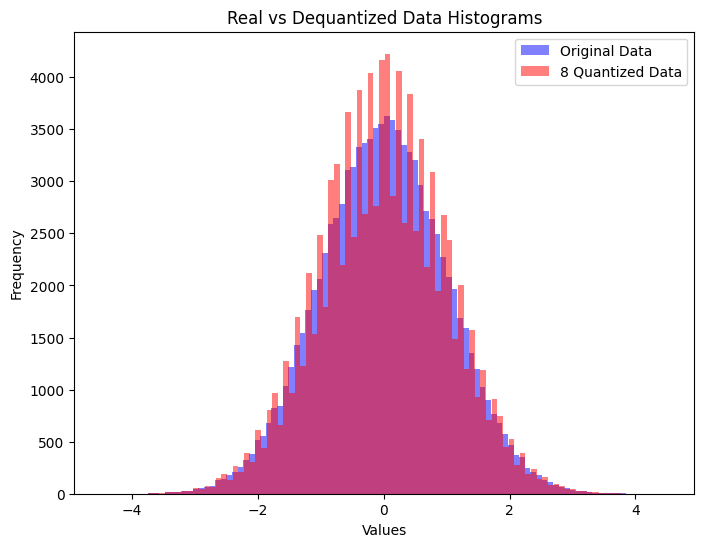

In [ ]:
# Generate some random data for the histogram
nbits = 8
quant_data, scale, offset = quantize(data, nbits)
dequant_data = dequantize(quant_data, scale, offset)
mse_error = ((data - dequant_data)**2).mean()
rmse_error = np.sqrt(mse_error)
print('mse_error, rmse_error:', mse_error, rmse_error)
# Create a figure
plt.figure(figsize=(8, 6))
# Plot the first histogram
plt.hist(data, bins=100, color='blue', alpha=0.5, label='Original Data')
# Plot the second histogram and overlay it on the first
plt.hist(dequant_data, bins=100, color='red', alpha=0.5, label='{} Quantized Data'.format(nbits))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Real vs Dequantized Data Histograms')
plt.legend()

# Show the overlapped histograms
plt.show()

quant data (min, max): -32768.0 32767.0
mse_error, rmse_error: 1.5509370834297814e-09 3.938193854331934e-05


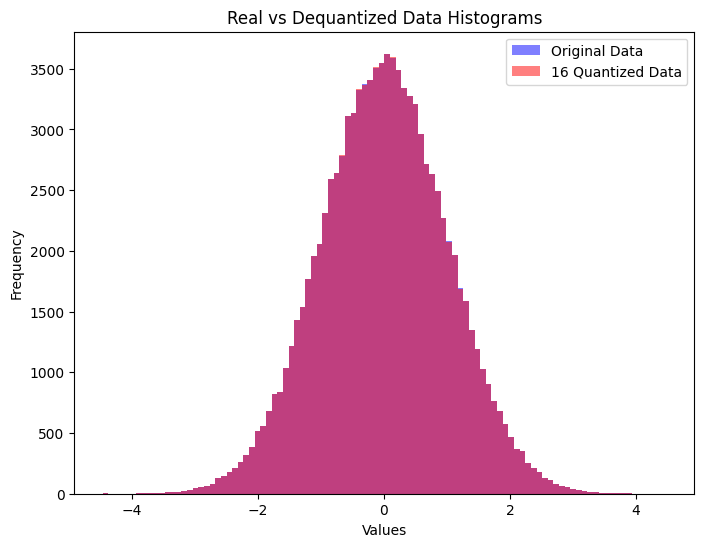

In [ ]:
# Generate some random data for the histogram
nbits = 16
quant_data, scale, offset = quantize(data, nbits)
dequant_data = dequantize(quant_data, scale, offset)
mse_error = ((data - dequant_data)**2).mean()
rmse_error = np.sqrt(mse_error)
print('mse_error, rmse_error:', mse_error, rmse_error)
# Create a figure
plt.figure(figsize=(8, 6))
# Plot the first histogram
plt.hist(data, bins=100, color='blue', alpha=0.5, label='Original Data')
# Plot the second histogram and overlay it on the first
plt.hist(dequant_data, bins=100, color='red', alpha=0.5, label='{} Quantized Data'.format(nbits))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Real vs Dequantized Data Histograms')
plt.legend()

# Show the overlapped histograms
plt.show()

r_min/r_max: -20 20
quant data (min, max): -23940.0 32767.0
mse_error, rmse_error: 0.005579374450836768 0.0746952103607505


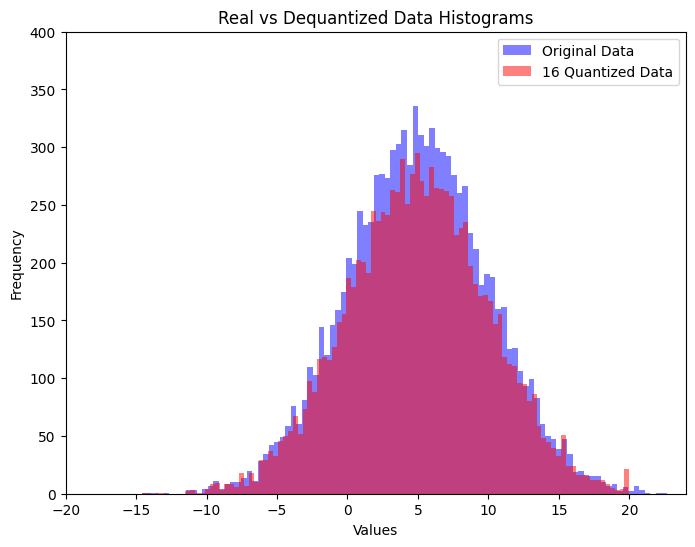

In [ ]:
# Generate some random data for the histogram
# Set the seed for reproducibility
np.random.seed(42)
# Define parameters for the distribution
size = 10000  # Number of data points
offset = 5   # Offset for the distribution
skewness = 5  # Degree of skewness
# Generate random data with skewness
data = np.random.normal(0, 1, size)
data = skewness * data + offset

def quantize(data, nbits):
  mean, std = np.mean(data), np.std(data)
  # r_min, r_max = mean - 3 * std, mean + 3 * std
  r_min, r_max = -20, 20 # np.min(data), np.max(data)
  print('r_min/r_max:', r_min, r_max)
  q_min, q_max = - (2**(nbits - 1)), (2**(nbits - 1) - 1)
  scale = (r_max - r_min) / (q_max - q_min)
  offset = np.round(q_max - r_max / scale)
  quant_data = np.clip(np.round((data/scale) + offset), q_min, q_max)
  print('quant data (min, max):', np.min(quant_data), np.max(quant_data))
  return quant_data, scale, offset

def dequantize(quant_data, scale, offset):
  dequant_data = scale * (quant_data - offset)
  return dequant_data

# Generate some random data for the histogram
nbits = 16
quant_data, scale, offset = quantize(data, nbits)
dequant_data = dequantize(quant_data, scale, offset)
mse_error = ((data - dequant_data)**2).mean()
rmse_error = np.sqrt(mse_error)
print('mse_error, rmse_error:', mse_error, rmse_error)
# Create a figure
plt.figure(figsize=(8, 6))
# Plot the first histogram
plt.hist(data, bins=100, color='blue', alpha=0.5, label='Original Data')
# Plot the second histogram and overlay it on the first
plt.hist(dequant_data, bins=100, color='red', alpha=0.5, label='{} Quantized Data'.format(nbits))
plt.xlim(-20, 24)  # Set the x-axis limits from -20 to 20
plt.ylim(0, 400)  # Set the x-axis limits from -10 to 10
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Real vs Dequantized Data Histograms')
plt.legend()

# Show the overlapped histograms
plt.show()

r_min/r_max: -14.612001258091713 24.631188532181632
quant data (min, max): -32768.0 32767.0
mse_error, rmse_error: 2.9545889070017808e-08 0.00017188917670993078


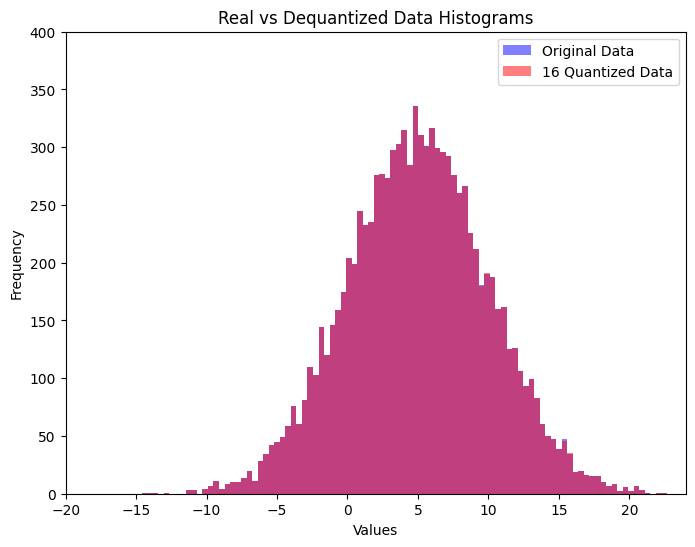

In [ ]:
# Generate some random data for the histogram
# Set the seed for reproducibility
np.random.seed(42)
# Define parameters for the distribution
size = 10000  # Number of data points
offset = 5   # Offset for the distribution
skewness = 5  # Degree of skewness
# Generate random data with skewness
data = np.random.normal(0, 1, size)
data = skewness * data + offset

def quantize(data, nbits):
  mean, std = np.mean(data), np.std(data)
  # r_min, r_max = mean - 3 * std, mean + 3 * std
  r_min, r_max = np.min(data), np.max(data)
  print('r_min/r_max:', r_min, r_max)
  q_min, q_max = - (2**(nbits - 1)), (2**(nbits - 1) - 1)
  scale = (r_max - r_min) / (q_max - q_min)
  offset = np.round(q_max - r_max / scale)
  quant_data = np.clip(np.round((data/scale) + offset), q_min, q_max)
  print('quant data (min, max):', np.min(quant_data), np.max(quant_data))
  return quant_data, scale, offset

def dequantize(quant_data, scale, offset):
  dequant_data = scale * (quant_data - offset)
  return dequant_data

# Generate some random data for the histogram
nbits = 16
quant_data, scale, offset = quantize(data, nbits)
dequant_data = dequantize(quant_data, scale, offset)
mse_error = ((data - dequant_data)**2).mean()
rmse_error = np.sqrt(mse_error)
print('mse_error, rmse_error:', mse_error, rmse_error)
# Create a figure
plt.figure(figsize=(8, 6))
# Plot the first histogram
plt.hist(data, bins=100, color='blue', alpha=0.5, label='Original Data')
# Plot the second histogram and overlay it on the first
plt.hist(dequant_data, bins=100, color='red', alpha=0.5, label='{} Quantized Data'.format(nbits))
plt.xlim(-20, 24)  # Set the x-axis limits from -20 to 20
plt.ylim(0, 400)  # Set the x-axis limits from -10 to 10
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Real vs Dequantized Data Histograms')
plt.legend()

# Show the overlapped histograms
plt.show()

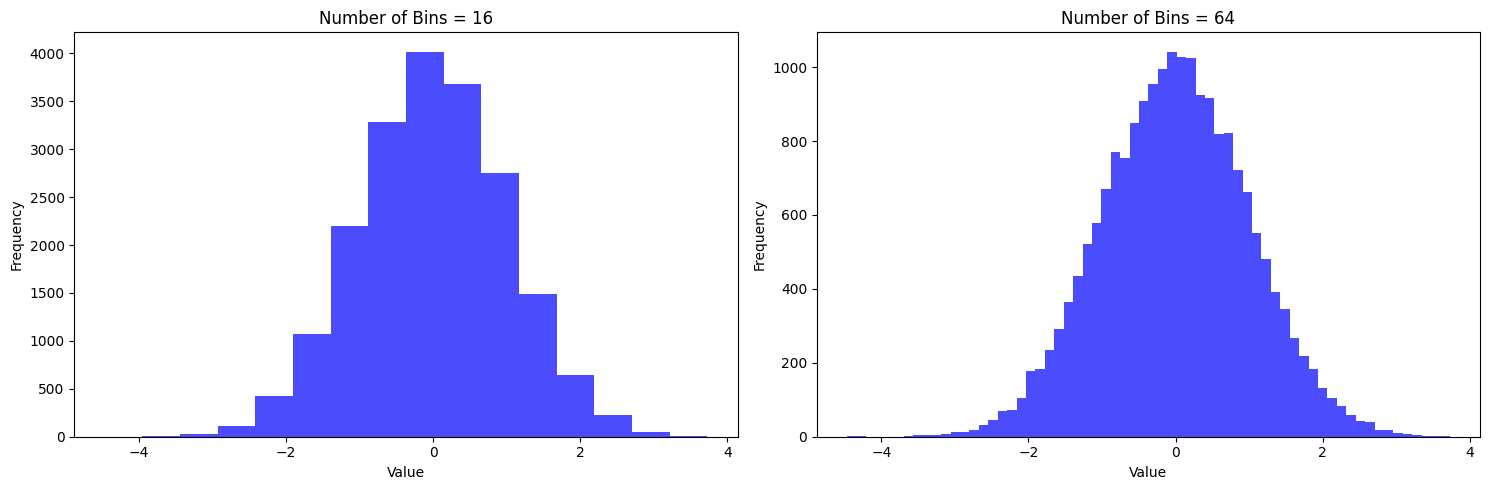

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for demonstration
data = np.random.randn(20000)

# Specify different numbers of bins
bin_counts = [16, 64]

# Create subplots to display histograms with different bins
fig, axes = plt.subplots(nrows=1, ncols=len(bin_counts), figsize=(15, 5))

for i, bins in enumerate(bin_counts):
    # Plot histogram
    axes[i].hist(data, bins=bins, color='blue', alpha=0.7)

    # Set labels and title
    axes[i].set_title(f'Number of Bins = {bins}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


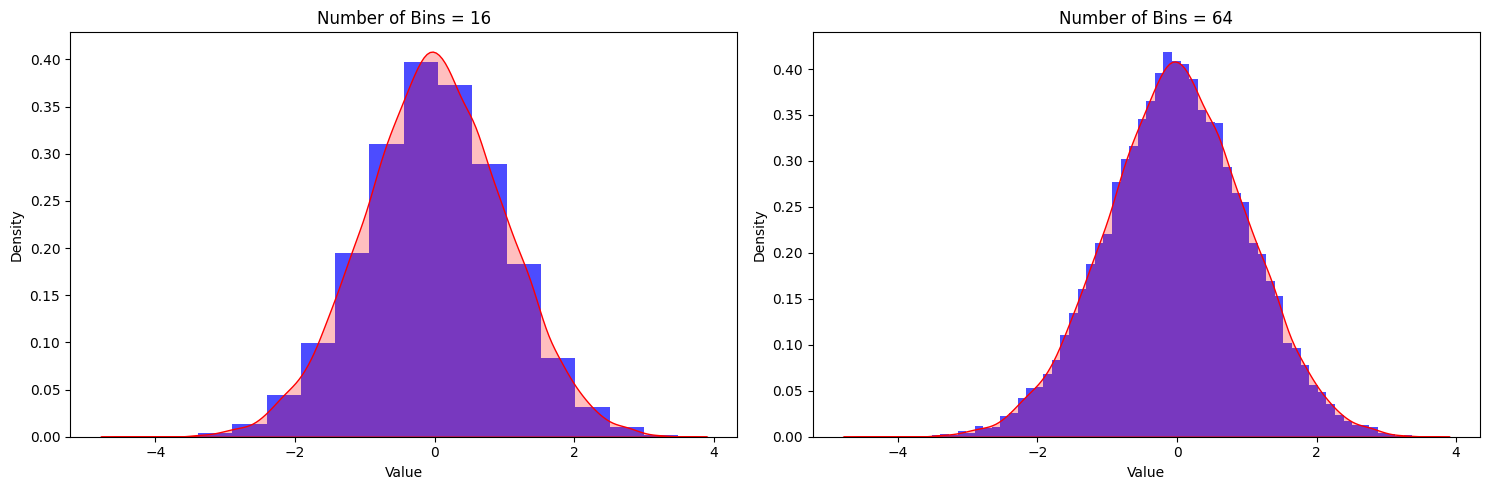

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate random data for demonstration
data = np.random.randn(20000)
slipped_data = np.copy(data)
slipped_data[slipped_data > 1.5] = 1.5
slipped_data[slipped_data < -1.5] = -1.5


# Specify different numbers of bins
bin_counts = [16, 64]

# Create subplots to display histograms with different bins
fig, axes = plt.subplots(nrows=1, ncols=len(bin_counts), figsize=(15, 5))

for i, bins in enumerate(bin_counts):
    # Plot histogram
    axes[i].hist(data, bins=bins, density=True, color='blue', alpha=0.7)

    # Plot smooth line (Kernel Density Estimate) covering the complete range
    sns.kdeplot(data, ax=axes[i], color='red', fill=True, common_norm=False)

    # Set labels and title
    axes[i].set_title(f'Number of Bins = {bins}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


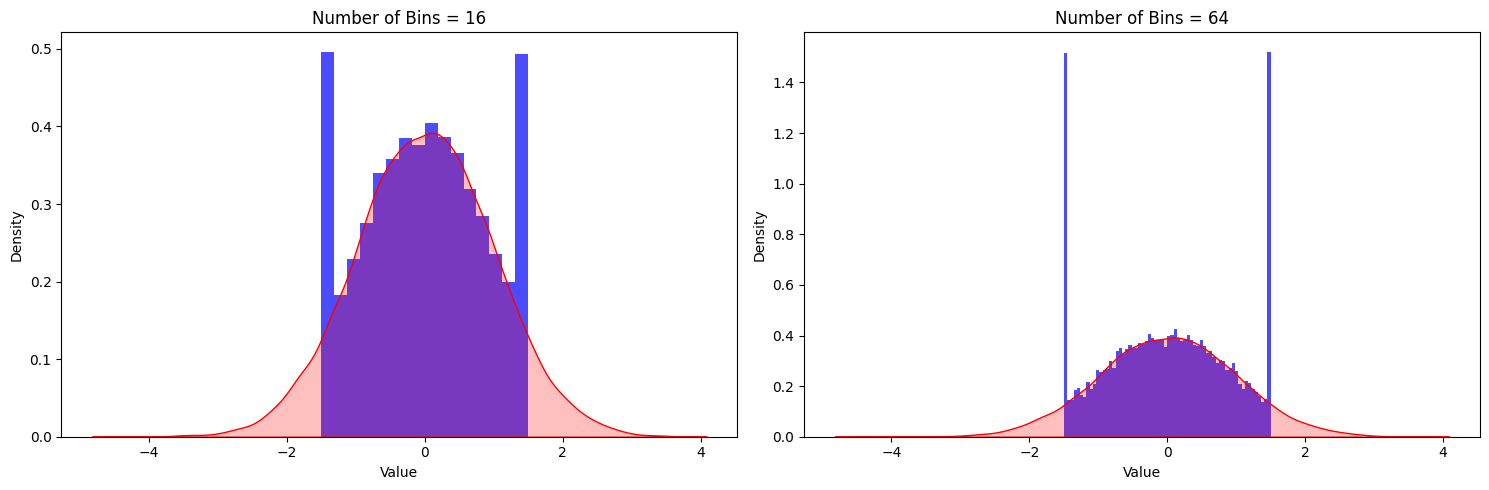

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate random data for demonstration
data = np.random.randn(20000)
slipped_data = np.copy(data)
slipped_data[slipped_data > 1.5] = 1.5
slipped_data[slipped_data < -1.5] = -1.5


# Specify different numbers of bins
bin_counts = [16, 64]

# Create subplots to display histograms with different bins
fig, axes = plt.subplots(nrows=1, ncols=len(bin_counts), figsize=(15, 5))

for i, bins in enumerate(bin_counts):
    # Plot histogram
    axes[i].hist(slipped_data, bins=bins, density=True, color='blue', alpha=0.7)

    # Plot smooth line (Kernel Density Estimate) covering the complete range
    sns.kdeplot(data, ax=axes[i], color='red', fill=True, common_norm=False)

    # Set labels and title
    axes[i].set_title(f'Number of Bins = {bins}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()
